In [10]:
import pyupbit
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.family'] = 'AppleGothic'   # Mac Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
mpl.rcParams['axes.unicode_minus'] = False    # ÏùåÏàò(-) Íπ®Ïßê Î∞©ÏßÄ

## ÏïåÌä∏ÏΩîÏù∏ ÌïòÎÇò ÌùîÎì§Î¥á

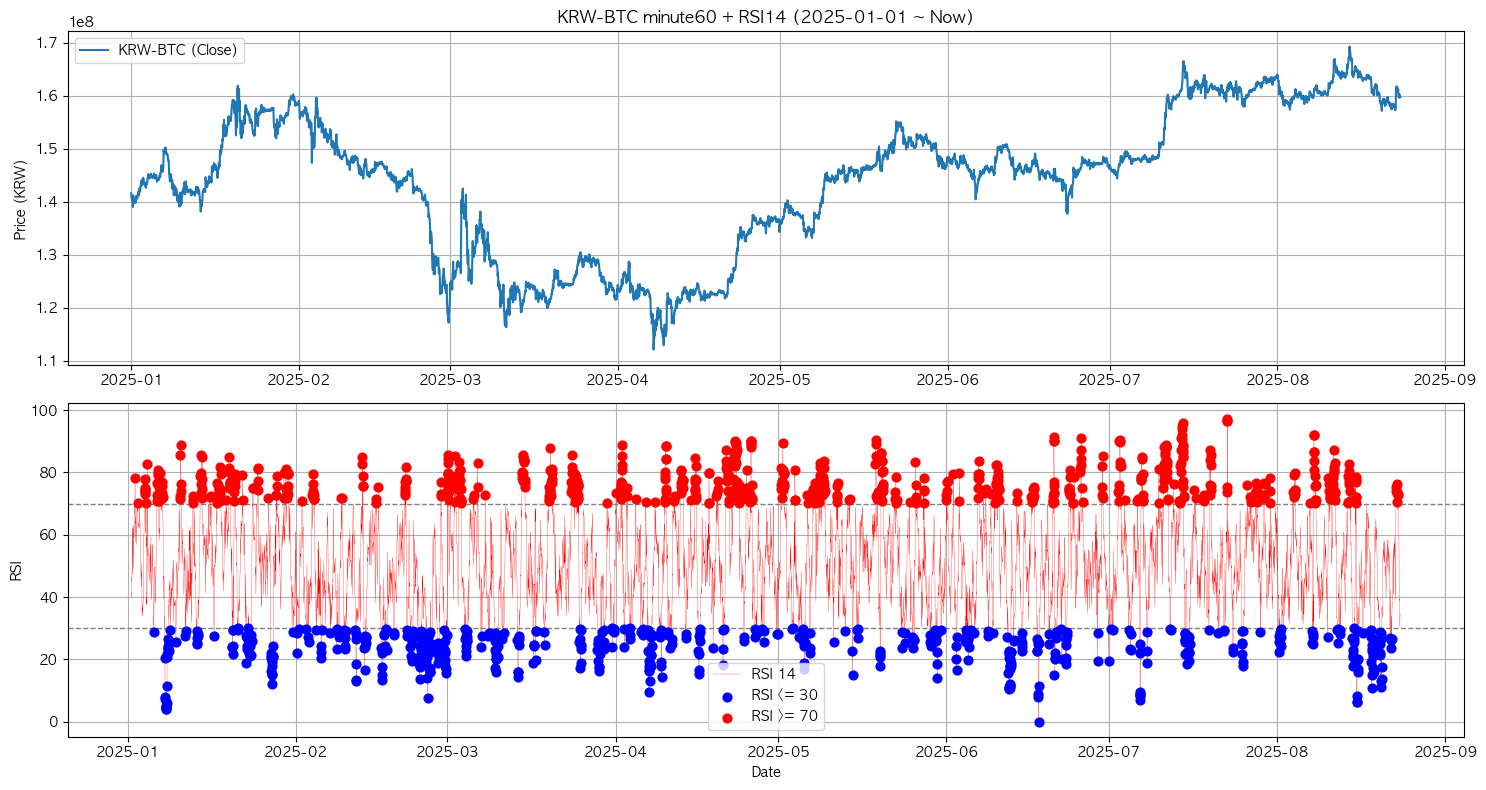


üìå [ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï†ÑÎûµ ÏöîÏïΩ]
- Î¥á Ïã§Ìñâ Ï£ºÍ∏∞: 15Î∂ÑÎßàÎã§ Ïã§Ìñâ (Ï¶â, Í∞ôÏùÄ Î¥âÏóêÏÑú 4Î≤à Í∏∞Ìöå Î∞úÏÉù Í∞ÄÏ†ï)
- Îß§Ïàò: RSI ‚â§ 30 ‚Üí ÎÇ®ÏùÄ ÌòÑÍ∏àÏùò 20%Ïî© Î∂ÑÌï† Îß§Ïàò (Îã®, ÏµúÏÜå 5,000Ïõê Ïù¥ÏÉÅÎßå Îß§Ïàò, ÏàòÏàòÎ£å 0.05% Î∞òÏòÅ)
- Îß§ÎèÑ: RSI ‚â• 70 Íµ¨Í∞ÑÏóêÏÑú
       ¬∑ ÏÜêÏã§/Î≥∏Ï†Ñ ‚Üí Ï†ÑÎüâ Îß§ÎèÑ
       ¬∑ ÏàòÏùµÎ•† ‚â• 25% ‚Üí Î≥¥Ïú† Î¨ºÎüâ Ï†àÎ∞ò Îß§ÎèÑ (Îã®, ÏµúÏÜå 5,000Ïõê Ïù¥ÏÉÅÏùº ÎïåÎßå)
- Í∑∏ Ïô∏ Íµ¨Í∞ÑÏùÄ Î≥¥Ïú† Ïú†ÏßÄ

üìå ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ ÌôòÍ≤Ω
 - Ï¢ÖÎ™©: KRW-BTC
 - ÏãúÏûëÏùº: 2025-01-01
 - Ï∞®Ìä∏ Í∞ÑÍ≤©: minute60
 - Î¥á Ïã§Ìñâ Ï£ºÍ∏∞: 15Î∂ÑÎßàÎã§ Ïã§Ìñâ Í∞ÄÏ†ï
 - Ï¥àÍ∏∞ ÏûêÎ≥∏: 1,000,000 Ïõê
 - ÏàòÏàòÎ£åÏú®: 0.05%
 - ÏµúÏÜå Í±∞Îûò Îã®ÏúÑ: 5,000 Ïõê

üìå ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ Ï£ºÍ∏∞
 - Ï∫îÎì§ Ï£ºÍ∏∞: 60Î∂Ñ (1ÏãúÍ∞Ñ)
 - Î¥á Ï£ºÍ∏∞: 15Î∂Ñ
 - Îî∞ÎùºÏÑú Ìïú Î¥âÏù¥ ÏôÑÏÑ±ÎêòÍ∏∞ Ï†ÑÍπåÏßÄ Ï°∞Í±¥ ÌôïÏù∏ Í∏∞Ìöå: 4Î≤à
üìä Í≥ºÎß§ÎèÑ Íµ¨Í∞Ñ Í∞úÏàò (RSI <= 30): 580
üìä Í≥ºÎß§Ïàò Íµ¨Í∞Ñ Í∞úÏàò (RSI >= 70): 708
2025-01-05 19:00:00 Îß§Ïàò: 14387

In [36]:
# ======================
# üîπ ÏÑ§Ï†ïÍ∞í (Ïó¨Í∏∞Îßå ÏàòÏ†ïÌï¥ÏÑú Ïû¨ÏÇ¨Ïö© Í∞ÄÎä•)
ticker = "KRW-BTC"          # ÎßàÏºì (Ïòà: KRW-ETH, KRW-XRP Îì±)
start_date = "2025-01-01"   # Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå ÏãúÏûëÏùº
interval = "minute240"      # Ï∫îÎì§ Í∞ÑÍ≤© ("minute60"=1ÏãúÍ∞Ñ, "minute240"=4ÏãúÍ∞Ñ, "day"=ÏùºÎ¥â Îì±)
bot_interval = 30          # Î¥á Ïã§Ìñâ Ï£ºÍ∏∞ (Î∂Ñ Îã®ÏúÑ: Ïòà 30=30Î∂ÑÎßàÎã§, 240=4ÏãúÍ∞ÑÎßàÎã§)

ticker = "KRW-BTC"          # ÎßàÏºì (Ïòà: KRW-ETH, KRW-XRP Îì±)
interval = "minute60"      # Ï∫îÎì§ Í∞ÑÍ≤© ("minute60"=1ÏãúÍ∞Ñ, "minute240"=4ÏãúÍ∞Ñ, "day"=ÏùºÎ¥â Îì±)
bot_interval = 15          # Î¥á Ïã§Ìñâ Ï£ºÍ∏∞ (Î∂Ñ Îã®ÏúÑ: Ïòà 30=30Î∂ÑÎßàÎã§, 240=4ÏãúÍ∞ÑÎßàÎã§)
fee = 0.0005                # ÏóÖÎπÑÌä∏ ÏãúÏû•Í∞Ä ÏàòÏàòÎ£å 0.05%
initial_capital = 1_000_000 # Ï¥àÍ∏∞ ÏûêÎ≥∏ 100ÎßåÏõê
min_trade = 5000            # ÏóÖÎπÑÌä∏ ÏµúÏÜå Ï£ºÎ¨∏ Îã®ÏúÑ 5Ï≤úÏõê
# ======================


# 1Ô∏è‚É£ OHLCV Îç∞Ïù¥ÌÑ∞ ÏàòÏßë (200Í∞úÏî© Î∞òÎ≥µ ÏöîÏ≤≠)
all_data = []
to = datetime.now()

while True:
    data = pyupbit.get_ohlcv(ticker, interval=interval, to=to, count=200)
    if data is None or data.empty:
        break
    all_data.append(data)
    to = data.index[0]  # Îã§Ïùå ÏöîÏ≤≠Ïùò ÎÅù ÏãúÏ†êÏùÑ Í∞±Ïã†
    if to < pd.to_datetime(start_date):
        break

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Ìï©ÏπòÍ≥† ÏãúÏûëÏùº Ïù¥ÌõÑÎßå ÌïÑÌÑ∞ÎßÅ
df = pd.concat(all_data)
df = df[df.index >= pd.to_datetime(start_date)]
df.sort_index(inplace=True)

# 2Ô∏è‚É£ RSI 14 Í≥ÑÏÇ∞
delta = df["close"].diff()               # Ï¢ÖÍ∞Ä Î≥ÄÌôîÎüâ
gain = np.where(delta > 0, delta, 0)     # ÏÉÅÏäπÎ∂Ñ
loss = np.where(delta < 0, -delta, 0)    # ÌïòÎùΩÎ∂Ñ

roll_up = pd.Series(gain).rolling(window=14).mean()
roll_down = pd.Series(loss).rolling(window=14).mean()

RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))
df["RSI14"] = RSI.values

# 3Ô∏è‚É£ RSI Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15,8))

# (a) Í∞ÄÍ≤© Ï∞®Ìä∏
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label=f"{ticker} (Close)")
plt.title(f"{ticker} {interval} + RSI14 ({start_date} ~ Now)")
plt.ylabel("Price (KRW)")
plt.legend()
plt.grid(True)

# (b) RSI Ï∞®Ìä∏
plt.subplot(2,1,2)
plt.plot(df.index, df["RSI14"], color="red", label="RSI 14", linewidth=0.2)
plt.axhline(70, color="gray", linestyle="--", linewidth=1)  # Í≥ºÎß§Ïàò Í∏∞Ï§ÄÏÑ†
plt.axhline(30, color="gray", linestyle="--", linewidth=1)  # Í≥ºÎß§ÎèÑ Í∏∞Ï§ÄÏÑ†

# RSI Ï°∞Í±¥Î≥Ñ Íµ¨Í∞Ñ ÌëúÏãú
oversold = df[df["RSI14"] <= 30]   # RSI 30 Ïù¥Ìïò (Í≥ºÎß§ÎèÑ)
overbought = df[df["RSI14"] >= 70] # RSI 70 Ïù¥ÏÉÅ (Í≥ºÎß§Ïàò)

plt.scatter(oversold.index, oversold["RSI14"], color="blue", s=40, zorder=5, label="RSI <= 30")
plt.scatter(overbought.index, overbought["RSI14"], color="red", s=40, zorder=5, label="RSI >= 70")

plt.ylabel("RSI")
plt.xlabel("Date")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# ======================
print("\n" + "="*50)
print("üìå [ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï†ÑÎûµ ÏöîÏïΩ]")
print(f"- Î¥á Ïã§Ìñâ Ï£ºÍ∏∞: {bot_interval}Î∂ÑÎßàÎã§ Ïã§Ìñâ (Ï¶â, Í∞ôÏùÄ Î¥âÏóêÏÑú {int(int(interval.replace('minute','')) / bot_interval)}Î≤à Í∏∞Ìöå Î∞úÏÉù Í∞ÄÏ†ï)")
print("- Îß§Ïàò: RSI ‚â§ 30 ‚Üí ÎÇ®ÏùÄ ÌòÑÍ∏àÏùò 20%Ïî© Î∂ÑÌï† Îß§Ïàò (Îã®, ÏµúÏÜå 5,000Ïõê Ïù¥ÏÉÅÎßå Îß§Ïàò, ÏàòÏàòÎ£å 0.05% Î∞òÏòÅ)")
print("- Îß§ÎèÑ: RSI ‚â• 70 Íµ¨Í∞ÑÏóêÏÑú")
print("       ¬∑ ÏÜêÏã§/Î≥∏Ï†Ñ ‚Üí Ï†ÑÎüâ Îß§ÎèÑ")
print("       ¬∑ ÏàòÏùµÎ•† ‚â• 25% ‚Üí Î≥¥Ïú† Î¨ºÎüâ Ï†àÎ∞ò Îß§ÎèÑ (Îã®, ÏµúÏÜå 5,000Ïõê Ïù¥ÏÉÅÏùº ÎïåÎßå)")
print("- Í∑∏ Ïô∏ Íµ¨Í∞ÑÏùÄ Î≥¥Ïú† Ïú†ÏßÄ")

# üîπ ÌòÑÏû¨ ÏÑ§Ï†ï Ï∂úÎ†•
print("\n===============================")
print("üìå ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ ÌôòÍ≤Ω")
print(f" - Ï¢ÖÎ™©: {ticker}")
print(f" - ÏãúÏûëÏùº: {start_date}")
print(f" - Ï∞®Ìä∏ Í∞ÑÍ≤©: {interval}")
print(f" - Î¥á Ïã§Ìñâ Ï£ºÍ∏∞: {bot_interval}Î∂ÑÎßàÎã§ Ïã§Ìñâ Í∞ÄÏ†ï")
print(f" - Ï¥àÍ∏∞ ÏûêÎ≥∏: {initial_capital:,} Ïõê")
print(f" - ÏàòÏàòÎ£åÏú®: {fee*100:.2f}%")
print(f" - ÏµúÏÜå Í±∞Îûò Îã®ÏúÑ: {min_trade:,} Ïõê")

print("\n===============================")
print("üìå ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ Ï£ºÍ∏∞")
candle_minutes = int(interval.replace("minute", "")) if "minute" in interval else None
if candle_minutes and bot_interval:
    checks_per_candle = candle_minutes // bot_interval
    print(f" - Ï∫îÎì§ Ï£ºÍ∏∞: {candle_minutes}Î∂Ñ ({candle_minutes//60}ÏãúÍ∞Ñ)")
    print(f" - Î¥á Ï£ºÍ∏∞: {bot_interval}Î∂Ñ")
    print(f" - Îî∞ÎùºÏÑú Ìïú Î¥âÏù¥ ÏôÑÏÑ±ÎêòÍ∏∞ Ï†ÑÍπåÏßÄ Ï°∞Í±¥ ÌôïÏù∏ Í∏∞Ìöå: {checks_per_candle}Î≤à")
print("===============================")

# RSI Íµ¨Í∞Ñ Í∞úÏàò Ïπ¥Ïö¥Ìä∏ Ï∂úÎ†•
print(f"üìä Í≥ºÎß§ÎèÑ Íµ¨Í∞Ñ Í∞úÏàò (RSI <= 30): {len(oversold)}")
print(f"üìä Í≥ºÎß§Ïàò Íµ¨Í∞Ñ Í∞úÏàò (RSI >= 70): {len(overbought)}")

# ======================
# 4Ô∏è‚É£ Îß§Îß§ ÏãúÎÆ¨Î†àÏù¥ÏÖò
capital = initial_capital  # ÌòÑÍ∏à Î≥¥Ïú†Ïï°
position = 0               # ÏΩîÏù∏ Î≥¥Ïú†Îüâ
avg_buy_price = 0          # ÌèâÍ∑† Îß§ÏàòÍ∞Ä (Î∂ÑÌï† Îß§Ïàò Î∞òÏòÅ)

for i in range(len(df)):
    rsi = df["RSI14"].iloc[i]    # iÎ≤àÏß∏ Î¥âÏùò RSI
    price = df["close"].iloc[i]  # iÎ≤àÏß∏ Î¥âÏùò Ï¢ÖÍ∞Ä

    # ‚úÖ Îß§Ïàò Ï°∞Í±¥: RSI 30 Ïù¥Ìïò ‚Üí ÎÇ®ÏùÄ ÌòÑÍ∏àÏùò 20% Îß§Ïàò (ÏµúÏÜå 5000Ïõê Ïù¥ÏÉÅÏùº ÎïåÎßå)
    if rsi <= 30 and capital > 0:
        invest_amount = capital * 0.2

        if invest_amount < min_trade:  # ÏµúÏÜå Îß§Ïàò Í∏àÏï° ÎØ∏ÎßåÏù¥Î©¥ Ïä§ÌÇµ
            continue

        btc_amount = (invest_amount * (1 - fee)) / price  # ÏàòÏàòÎ£å Î∞òÏòÅ
        total_cost = (avg_buy_price * position) + invest_amount
        position += btc_amount
        avg_buy_price = total_cost / position             # Í∞ÄÏ§ë ÌèâÍ∑† Îß§ÏàòÍ∞Ä
        capital -= invest_amount
        print(f"{df.index[i]} Îß§Ïàò: {price:.0f}Ïõê | Îß§Ïàò Í∏àÏï°: {invest_amount:.0f}Ïõê | ÌèâÍ∑† Îã®Í∞Ä: {avg_buy_price:.0f}Ïõê | ÏûîÏó¨ ÌòÑÍ∏à: {capital:.0f}Ïõê")

    # ‚úÖ Îß§ÎèÑ Ï°∞Í±¥: RSI 70 Ïù¥ÏÉÅ ‚Üí ÏÜêÏã§Ïù¥Î©¥ Ï†ÑÎüâ, 25% Ïù¥ÏÉÅ ÏàòÏùµÏù¥Î©¥ Ï†àÎ∞ò Îß§ÎèÑ (Îã®, ÏµúÏÜå 5000Ïõê Ïù¥ÏÉÅÏùº ÎïåÎßå)
    elif rsi >= 70 and position > 0:
        profit_rate = (price - avg_buy_price) / avg_buy_price * 100
        hold_value = position * price  # ÌòÑÏû¨ Î≥¥Ïú† ÏΩîÏù∏Ïùò ÌèâÍ∞Ä Í∏àÏï°

        if hold_value < min_trade:  # ÏµúÏÜå Îß§ÎèÑ Í∏àÏï° ÎØ∏ÎßåÏù¥Î©¥ Ïä§ÌÇµ
            continue

        if profit_rate <= 0:
            # ÏÜêÏã§ ‚Üí Ï†ÑÎüâ Îß§ÎèÑ
            sell_value = hold_value * (1 - fee)
            capital += sell_value
            print(f"{df.index[i]} Ï†ÑÎüâ Îß§ÎèÑ(ÏÜêÏã§/Î≥∏Ï†Ñ): {price:.0f}Ïõê | Îß§ÎèÑ Í∏àÏï°: {sell_value:,.0f}Ïõê | ÏàòÏùµÎ•†: {profit_rate:.2f}%")
            position = 0
            avg_buy_price = 0

        elif profit_rate >= 25:
            # ÏàòÏùµÎ•† 25% Ïù¥ÏÉÅ ‚Üí Ï†àÎ∞ò Îß§ÎèÑ
            sell_amount = position / 2
            sell_value = (sell_amount * price) * (1 - fee)

            if sell_value < min_trade:  # Ï†àÎ∞ò Îß§ÎèÑ Í∏àÏï°Ïù¥ 5000Ïõê ÎØ∏ÎßåÏù¥Î©¥ Ïä§ÌÇµ
                continue

            capital += sell_value
            position -= sell_amount
            print(f"{df.index[i]} Ï†àÎ∞ò Îß§ÎèÑ(ÏùµÏ†à): {price:.0f}Ïõê | Îß§ÎèÑ Í∏àÏï°: {sell_value:,.0f}Ïõê | ÎÇ®ÏùÄ {ticker}: {position:.6f} | ÏàòÏùµÎ•†: {profit_rate:.2f}%")

# 5Ô∏è‚É£ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï¢ÖÎ£å ÌõÑ ÏµúÏ¢Ö Ï†ïÏÇ∞
final_value = capital + (position * df["close"].iloc[-1])
profit_rate = (final_value - initial_capital) / initial_capital * 100

print("="*50)
print(f"üí∞ ÏµúÏ¢Ö ÌèâÍ∞Ä Í∏àÏï°: {final_value:,.0f} Ïõê")
print(f"üìà Ï¥ù ÏàòÏùµÎ•†: {profit_rate:.2f}%")
print("="*50)


## Îã§Ï§ë ÏûêÎèôÎß§Îß§

In [4]:
import pyupbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# ======================
# üîπ ÏÑ§Ï†ïÍ∞í
tickers = ["KRW-BTC", "KRW-ETH", "KRW-XRP", "KRW-ADA", "KRW-SOL"]  # 5Í∞ú ÏΩîÏù∏
start_date = "2025-01-01"
interval = "minute60"      # 4ÏãúÍ∞ÑÎ¥â
bot_interval = 30           # 30Î∂ÑÎßàÎã§ Ïã§Ìñâ
fee = 0.0005                # ÏóÖÎπÑÌä∏ ÏàòÏàòÎ£å 0.05%
initial_capital = 1_000_000 # ÏΩîÏù∏Î≥Ñ Ï¥àÍ∏∞ÏûêÎ≥∏ 100ÎßåÏõê
min_trade = 5000            # ÏµúÏÜå Í±∞ÎûòÎã®ÏúÑ
# ======================

def get_rsi_dataframe(ticker, start_date, interval):
    """ÏΩîÏù∏ Îç∞Ïù¥ÌÑ∞ + RSI14 Í≥ÑÏÇ∞"""
    all_data = []
    to = datetime.now()
    while True:
        data = pyupbit.get_ohlcv(ticker, interval=interval, to=to, count=200)
        if data is None or data.empty:
            break
        all_data.append(data)
        to = data.index[0]
        if to < pd.to_datetime(start_date):
            break

    df = pd.concat(all_data)
    df = df[df.index >= pd.to_datetime(start_date)]
    df.sort_index(inplace=True)

    delta = df["close"].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    roll_up = pd.Series(gain).rolling(window=14).mean()
    roll_down = pd.Series(loss).rolling(window=14).mean()
    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    df["RSI14"] = RSI.values
    return df

def simulate_trading(ticker, df):
    """RSI Í∏∞Î∞ò Îß§Îß§ ÏãúÎÆ¨Î†àÏù¥ÏÖò"""
    capital = initial_capital
    position = 0
    avg_buy_price = 0

    for i in range(len(df)):
        rsi = df["RSI14"].iloc[i]
        price = df["close"].iloc[i]

        # Îß§Ïàò Ï°∞Í±¥
        if rsi <= 30 and capital > 0:
            invest_amount = capital * 0.2
            if invest_amount < min_trade:
                continue
            btc_amount = (invest_amount * (1 - fee)) / price
            total_cost = (avg_buy_price * position) + invest_amount
            position += btc_amount
            avg_buy_price = total_cost / position
            capital -= invest_amount

        # Îß§ÎèÑ Ï°∞Í±¥
        elif rsi >= 70 and position > 0:
            profit_rate = (price - avg_buy_price) / avg_buy_price * 100
            hold_value = position * price
            if hold_value < min_trade:
                continue

            if profit_rate <= 0:  # ÏÜêÏã§ ‚Üí Ï†ÑÎüâ Îß§ÎèÑ
                sell_value = hold_value * (1 - fee)
                capital += sell_value
                position = 0
                avg_buy_price = 0
            elif profit_rate >= 25:  # ÏàòÏùµÎ•† 25% Ïù¥ÏÉÅ ‚Üí Ï†àÎ∞ò Îß§ÎèÑ
                sell_amount = position / 2
                sell_value = (sell_amount * price) * (1 - fee)
                if sell_value < min_trade:
                    continue
                capital += sell_value
                position -= sell_amount

    final_value = capital + (position * df["close"].iloc[-1])
    profit_rate = (final_value - initial_capital) / initial_capital * 100
    return final_value, profit_rate

# ======================
# üîπ Ïã§Ìñâ
results = {}
total_value = 0

for ticker in tickers:
    df = get_rsi_dataframe(ticker, start_date, interval)
    final_value, profit_rate = simulate_trading(ticker, df)
    results[ticker] = (final_value, profit_rate)
    total_value += final_value

# ======================
# üîπ Í≤∞Í≥º Ï∂úÎ†•
print("="*50)
print("üìå [Îã§Ï§ë ÏΩîÏù∏ ÏûêÎèôÎß§Îß§ ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º]")
for t, (val, pr) in results.items():
    print(f" - {t}: ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï° {val:,.0f} Ïõê | ÏàòÏùµÎ•† {pr:.2f}%")
print("-"*50)
print(f"üí∞ Ï¥ùÌï© (5Í∞ú ÏΩîÏù∏): {total_value:,.0f} Ïõê")
print("="*50)


üìå [Îã§Ï§ë ÏΩîÏù∏ ÏûêÎèôÎß§Îß§ ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º]
 - KRW-BTC: ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï° 1,154,013 Ïõê | ÏàòÏùµÎ•† 15.40%
 - KRW-ETH: ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï° 817,648 Ïõê | ÏàòÏùµÎ•† -18.24%
 - KRW-XRP: ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï° 1,602,787 Ïõê | ÏàòÏùµÎ•† 60.28%
 - KRW-ADA: ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï° 1,535,141 Ïõê | ÏàòÏùµÎ•† 53.51%
 - KRW-SOL: ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï° 996,333 Ïõê | ÏàòÏùµÎ•† -0.37%
--------------------------------------------------
üí∞ Ï¥ùÌï© (5Í∞ú ÏΩîÏù∏): 6,105,922 Ïõê


## Îã§Ï§ë ÏûêÎèôÎß§Îß§ Í∞úÏÑ†Ï§ë

In [ ]:
# # [made by index]
# import pyupbit
# import pandas as pd
# import numpy as np
# from datetime import datetime

# # ======================
# # üîπ ÏÑ§Ï†ïÍ∞í
# tickers = ["KRW-BTC", "KRW-ETH", "KRW-XRP", "KRW-ADA", "KRW-SOL"]
# start_date = "2025-01-01"
# interval = "minute60"
# bot_interval = 15
# fee = 0.0005
# initial_capital = 1_000_000
# min_trade = 5000
# # ======================

# def get_rsi_dataframe(ticker, start_date, interval):
#     all_data = []
#     to = datetime.now()
#     while True:
#         df = pyupbit.get_ohlcv(ticker, interval=interval, to=to, count=200)
#         if df is None or df.empty:
#             break
#         all_data.append(df)
#         to = df.index[0]
#         if to < pd.to_datetime(start_date):
#             break

#     df = pd.concat(all_data)
#     df = df[df.index >= pd.to_datetime(start_date)]
#     df.sort_index(inplace=True)

#     delta = df["close"].diff()
#     gain = np.where(delta > 0, delta, 0)
#     loss = np.where(delta < 0, -delta, 0)
#     roll_up = pd.Series(gain).rolling(window=14).mean()
#     roll_down = pd.Series(loss).rolling(window=14).mean()
#     RS = roll_up / roll_down
#     RSI = 100.0 - (100.0 / (1.0 + RS))
#     df["RSI14"] = RSI.values
#     return df

# # ======================
# # üîπ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
# print("‚è≥ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ï§ë...")

# dfs = []
# for t in tickers:
#     df = get_rsi_dataframe(t, start_date, interval)
#     df["ticker"] = t
#     dfs.append(df)

# df_all = pd.concat(dfs).sort_index()

# # ======================
# # üîπ ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ
# capital = initial_capital
# positions = {t: {"amount": 0, "avg_buy": 0, "invested": 0} for t in tickers}
# realized_pnl = {t: 0 for t in tickers}  # üí° Ïã§ÌòÑ ÏÜêÏùµ Ï∂îÍ∞Ä

# for time, group in df_all.groupby(df_all.index):
#     for _, row in group.iterrows():
#         ticker = row["ticker"]
#         price = row["close"]
#         rsi = row["RSI14"]

#         # ‚úÖ Îß§Ïàò Ï°∞Í±¥
#         if rsi <= 30 and capital > 0:
#             invest_amount = capital * 0.2
#             if invest_amount < min_trade:
#                 continue
#             amount = (invest_amount * (1 - fee)) / price
#             total_cost = positions[ticker]["avg_buy"] * positions[ticker]["amount"] + invest_amount
#             positions[ticker]["amount"] += amount
#             positions[ticker]["invested"] += invest_amount
#             positions[ticker]["avg_buy"] = total_cost / positions[ticker]["amount"]
#             capital -= invest_amount

#         # ‚úÖ Îß§ÎèÑ Ï°∞Í±¥
#         elif rsi >= 70 and positions[ticker]["amount"] > 0:
#             hold_value = positions[ticker]["amount"] * price
#             if hold_value < min_trade:
#                 continue

#             avg_buy = positions[ticker]["avg_buy"]
#             profit_rate = (price - avg_buy) / avg_buy * 100

#             if profit_rate <= 0:  # Ï†ÑÎüâ ÏÜêÏ†à
#                 sell_value = hold_value * (1 - fee)
#                 realized_pnl[ticker] += sell_value - positions[ticker]["invested"]
#                 capital += sell_value
#                 positions[ticker] = {"amount": 0, "avg_buy": 0, "invested": 0}

#             elif profit_rate >= 25:  # Ï†àÎ∞ò ÏùµÏ†à
#                 sell_amount = positions[ticker]["amount"] / 2
#                 sell_value = (sell_amount * price) * (1 - fee)
#                 if sell_value < min_trade:
#                     continue
#                 realized_pnl[ticker] += sell_value - (positions[ticker]["invested"] / 2)
#                 capital += sell_value
#                 positions[ticker]["amount"] -= sell_amount
#                 positions[ticker]["invested"] *= 0.5

# # ======================
# # üîπ ÏµúÏ¢Ö ÌèâÍ∞Ä
# final_value = capital
# coin_results = {}

# for t in tickers:
#     df = dfs[tickers.index(t)]
#     last_price = df["close"].iloc[-1]
#     hold_value = positions[t]["amount"] * last_price
#     invested = positions[t]["invested"]
#     realized = realized_pnl[t]

#     final_value += hold_value

#     # Ïã§ÌòÑÏÜêÏùµ + ÌòÑÏû¨ Î≥¥Ïú† ÌèâÍ∞ÄÏÜêÏùµ
#     total_invested = invested + max(-realized, 0)  # ÏÜêÏã§Ïù¥ÏóàÏúºÎ©¥ Ìà¨ÏûêÍ∏àÏï°ÏúºÎ°ú Í∞ÑÏ£º
#     total_profit = realized + (hold_value - invested)

#     if total_invested > 0:
#         profit_rate = total_profit / total_invested * 100
#         coin_results[t] = (hold_value + realized, total_invested, profit_rate)
#     else:
#         coin_results[t] = (0, 0, None)

# total_profit_rate = (final_value - initial_capital) / initial_capital * 100

# # ======================
# # üîπ Í≤∞Í≥º Ï∂úÎ†•
# print("="*60)
# print("üìå [Îã§Ï§ë ÏΩîÏù∏ Í≥µÏú†ÏûêÎ≥∏ ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º]")
# print(f" - Ï¥ù Ï¥àÍ∏∞ ÏûêÎ≥∏: {initial_capital:,.0f} Ïõê")
# print(f" - ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï°: {final_value:,.0f} Ïõê")
# print(f" - Ï¥ù ÏàòÏùµÎ•†: {total_profit_rate:.2f}%")
# print("-"*60)
# print("üìä ÏΩîÏù∏Î≥Ñ Í≤∞Í≥º:")

# for t, (val, invested, pr) in coin_results.items():
#     if pr is None:
#         print(f" - {t}: Í±∞Îûò ÏóÜÏùå")
#     else:
#         print(f" - {t}: Ìà¨ÏûêÍ∏à {invested:,.0f} Ïõê ‚Üí ÌèâÍ∞ÄÍ∏àÏï° {val:,.0f} Ïõê | ÏàòÏùµÎ•† {pr:.2f}%")

# print("="*60)


‚è≥ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ï§ë...
üìå [Îã§Ï§ë ÏΩîÏù∏ Í≥µÏú†ÏûêÎ≥∏ ÏãúÎÆ¨Î†àÏù¥ÏÖò Í≤∞Í≥º]
 - Ï¥ù Ï¥àÍ∏∞ ÏûêÎ≥∏: 1,000,000 Ïõê
 - ÏµúÏ¢Ö ÌèâÍ∞ÄÍ∏àÏï°: 1,018,668 Ïõê
 - Ï¥ù ÏàòÏùµÎ•†: 1.87%
------------------------------------------------------------
üìä ÏΩîÏù∏Î≥Ñ Í≤∞Í≥º:
 - KRW-BTC: Ìà¨ÏûêÍ∏à 802,452 Ïõê ‚Üí ÌèâÍ∞ÄÍ∏àÏï° 868,333 Ïõê | ÏàòÏùµÎ•† 8.75%
 - KRW-ETH: Ìà¨ÏûêÍ∏à 21,206 Ïõê ‚Üí ÌèâÍ∞ÄÍ∏àÏï° -10,804 Ïõê | ÏàòÏùµÎ•† -70.37%
 - KRW-XRP: Ìà¨ÏûêÍ∏à 15,744 Ïõê ‚Üí ÌèâÍ∞ÄÍ∏àÏï° -15,744 Ïõê | ÏàòÏùµÎ•† -100.00%
 - KRW-ADA: Ìà¨ÏûêÍ∏à 139,945 Ïõê ‚Üí ÌèâÍ∞ÄÍ∏àÏï° -130,221 Ïõê | ÏàòÏùµÎ•† -96.13%
 - KRW-SOL: Ìà¨ÏûêÍ∏à 4,181 Ïõê ‚Üí ÌèâÍ∞ÄÍ∏àÏï° 117,847 Ïõê | ÏàòÏùµÎ•† 2718.67%


## Ïã§Ï†ú ÏΩîÎìú Î∞±ÌÖåÏä§ÌåÖ